In [2]:
import pandas as pd
import numpy as np

In [3]:
# labels = pd.read_csv('output/labels.csv', index_col=0)
# features = pd.read_csv('output/features.csv', index_col=0)
from auxiliary import load_csv
data = load_csv('input/train.csv')
features, labels = data.iloc[:, :-1], data.iloc[:, -1]

The memory usage after optimization decreased to 1.6939277648925781 MiB (-3.48 %)


In [14]:
pd.unique(features['title'])

[' Jr. Business Analyst & Quality Analyst (entr..., 'English Teacher Abroad ', 'SQL Server Database Developer Job opportunity..., 'Legal Analyst - 12 Month FTC', 'Part-Time Finance Assistant', ..., 'Cooks & Chefs Wanted in Australia', 'Driver - Light Duty (Seattle)', 'Service Delivery Manager 3 ', ' Senior IT Security Lead (SIEM / IDS)', 'Front-End Web Engineer']
Length: 7227
Categories (7227, object): ['   Electrician ', '   Environmental Technician I', '   Piping Material Engineer', '  Discipline Manager Civil, Structural, Marin..., ..., 'warehouse opperative', 'web designer', 'web project manager', '~ LM Structures - Expression of Interest for ...]

In [5]:
features.head(20)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption
Id,,,,,,,,,,,,,,,,,,
0,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,0,0,0,Full-time,Entry level,Master's Degree,Financial Services,Finance,-0.410911
1,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,-0.163785
2,11979,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",NaN,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,-0.244369
3,9375,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,NaN,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,0,1,0,Full-time,Associate,Professional,Financial Services,Legal,-0.456807
4,1301,Part-Time Finance Assistant,"GB, LND,",NaN,NaN,NaN,Salary:£9 - £10 per hour We are currently goin...,"Your role will be a varied, interesting and in...",Salary:£9 - £10 per hour,0,0,0,Part-time,NaN,NaN,Accounting,NaN,-0.217880
5,704,JAVA developer,"BE, , Brussels",NaN,NaN,EUROPEAN DYNAMICS (#URL_c66532ffa1ce76ab447da6...,We currently have a vacancy for a JAVA Develop...,Your skills:Minimum 6 years of relevant Univer...,Our offer: If you are seeking a career in an e...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0.254038
6,9362,iOS Developer,"US, ,",NaN,NaN,WillDom is a top notch IT Outsourcing Business...,"We are looking for an iOS Developer, responsib...",What you will do:• Works alone or with lead en...,NaN,0,1,0,Contract,Mid-Senior level,NaN,Computer Software,Information Technology,0.226288
7,3395,European Sales Executive,"GB, LND, London",Sales,NaN,import•io was founded in 2012 by David White (...,import•io is on the hunt for a bi-lingual sale...,Duties/ResponsibilitiesNegotiating with direct...,About Usimport·io is a hugely exciting startup...,0,1,1,Full-time,Associate,Bachelor's Degree,Computer Software,Sales,0.065316
8,8743,Editorial Associate,"US, CA, El Segundo",Content,NaN,ConsumerTrack is a technology-centric internet...,ConsumerTrack is a performance based marketing...,"A degree in English, Journalism, or similarA c...",Competitive salary with excellent growth oppor...,0,1,1,NaN,NaN,NaN,NaN,NaN,0.088923


#### First of all let's note we are facing an unbalaced problem

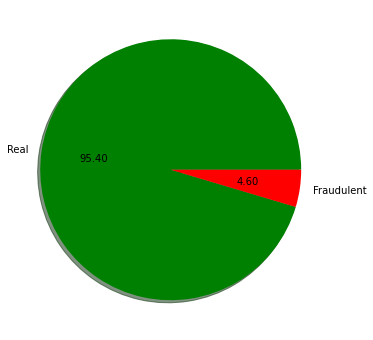

In [3]:
y = labels['fraudulent']
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['Real','Fraudulent'],colors=['g','r'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

## NaN analysis & removal 

In [4]:
nan_labels = 100 * labels.apply(lambda x: pd.isna(x)).sum(axis=0) / len(labels)
print("There are", nan_labels.values[0], "nans in the labels")

There are 0.0 nans in the labels


In [5]:
features.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,required_doughnuts_comsumption
Id,,,,,,,,,,,,,,,,,,
0,5737,Jr. Business Analyst & Quality Analyst (entry...,"US, NJ, PISCATAWAY",NaN,NaN,NaN,"Duration: Full time / W2Location: Piscataway,N...",What we require:-- Masters degree in Computers...,NaN,0,0,0,Full-time,Entry level,Master's Degree,Financial Services,Finance,-0.410911
1,7107,English Teacher Abroad,"US, PA, Scranton",NaN,NaN,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Contract,NaN,Bachelor's Degree,Education Management,NaN,-0.163785
2,11979,SQL Server Database Developer Job opportunity ...,"US, IL, Barrington",NaN,90000-100000,We are an innovative personnel-sourcing firm w...,Position : SQL Server Database DeveloperJob Lo...,Position : SQL Server Database DeveloperJob Lo...,Benefits - FullBonus Eligible - Yes,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,-0.244369
3,9375,Legal Analyst - 12 Month FTC,"GB, LND, London",Legal,NaN,MarketInvoice is one of the most high-profile ...,DescriptionOur mission at MarketInvoice is to ...,Duties and ResponsibilitiesReviewing contractu...,Competitive salaryPrivate HealthcareHalf price...,0,1,0,Full-time,Associate,Professional,Financial Services,Legal,-0.456807
4,1301,Part-Time Finance Assistant,"GB, LND,",NaN,NaN,NaN,Salary:£9 - £10 per hour We are currently goin...,"Your role will be a varied, interesting and in...",Salary:£9 - £10 per hour,0,0,0,Part-time,NaN,NaN,Accounting,NaN,-0.217880


#### Note that most of the variables are categorical (even though their ``dtype`` is still ``object``, instead of ``str``)

In [6]:
from auxiliary import reduce_mem_usage
try:
    # we reduce mem usage and convert to correct dtype
    features = reduce_mem_usage(features)
    labels = reduce_mem_usage(labels) 
except TypeError:
    pass  # if jupyter notebook complains (w/ just the conda compiler gives no trouble)

The memory usage after optimization decreased to 1.6836967468261719 MiB (-8.27 %)
The memory usage after optimization decreased to 0.09207916259765625 MiB (43.75 %)


In [7]:
features.dtypes

job_id                               int16
title                             category
location                          category
department                        category
salary_range                      category
company_profile                   category
description                       category
requirements                      category
benefits                          category
telecommuting                         int8
has_company_logo                      int8
has_questions                         int8
employment_type                   category
required_experience               category
required_education                category
industry                          category
function                          category
required_doughnuts_comsumption     float32
dtype: object

### Let's first see how many NaNs there are for each feature

In [8]:
from auxiliary import compute_nan_statistics
compute_nan_statistics(features)['% samples w/ nan']

job_id                             0.000000
title                              0.000000
location                           1.910887
department                        65.333706
salary_range                      84.069724
company_profile                   18.288591
description                        0.009321
requirements                      15.184564
benefits                          40.715884
telecommuting                      0.000000
has_company_logo                   0.000000
has_questions                      0.000000
employment_type                   19.183445
required_experience               39.513423
required_education                45.684191
industry                          27.395600
function                          36.073826
required_doughnuts_comsumption     0.000000
Name: % samples w/ nan, dtype: float64

In [9]:
rows_with_nan =  features.apply(lambda x: np.any(pd.isna(x)), axis=1)
print("There are", 100 * (len(rows_with_nan) - rows_with_nan.sum(axis=0)) / len(rows_with_nan),
      '% of rows without any nan!')

There are 4.120059656972408 % of rows without any nan!


<p>It is clear in a first analysis, the following variables can be dropped:</p>
<ul>
    <li>Salary range</li>
    <li>Department</li>
</ul>

In [10]:
# Let's drop these features...

In [11]:
try:
    features = features.drop(columns=['salary_range', 'department'])
except KeyError:
    pass  # already dropped

#### Let's see which variables are the most likely to present nans alone or in company of other variables...

In [12]:
compute_nan_statistics(features)

,% samples w/ nan,% samples w/ 2 nan,% samples w/ 3 nan,% samples w/ 4 nan,% samples w/ 5 nan,% samples w/ 6 nan,% samples w/ 7 nan,% samples w/ 8 nan,% samples w/ 9 nan
job_id,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
title,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
location,1.910887,1.799031,1.743102,1.491424,1.398210,1.249068,1.025354,0.736391,0.065250
company_profile,18.288591,14.317673,11.204325,8.846010,7.028337,5.835198,3.057420,1.351603,0.074571
description,0.009321,0.009321,0.009321,0.009321,0.009321,0.009321,0.009321,0.009321,0.009321
requirements,15.184564,14.867636,13.282998,11.474646,10.216257,7.774049,4.958986,1.985459,0.074571
benefits,40.715884,31.077554,25.009321,20.432513,16.936987,12.397465,6.226696,2.004101,0.074571
telecommuting,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
has_company_logo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
has_questions,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<p>
    So this implies that, in case any sample should be dropped because of nans in one particular feature, we ought to start by those features with less nan in total and those in which they are more likely not to be alone (to delete the maximum nan quantity). For instance, we could drop:
</p>

<ul>
    <li> Samples whose ``requirements`` field is nan.
        

In [13]:
# we take those samples in which ``requirements`` is not na...
features = features[features['requirements'].notna()]
features.shape

(9099, 16)

In [14]:
compute_nan_statistics(features)

,% samples w/ nan,% samples w/ 2 nan,% samples w/ 3 nan,% samples w/ 4 nan,% samples w/ 5 nan,% samples w/ 6 nan,% samples w/ 7 nan
job_id,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
title,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
location,1.142983,1.011100,0.945159,0.681394,0.582482,0.461589,0.219804
company_profile,16.891966,12.210133,8.781185,6.934828,5.330256,4.319156,1.582591
description,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
requirements,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
benefits,32.058468,20.694582,14.781844,11.275964,8.528410,5.956699,1.736455
telecommuting,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
has_company_logo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
has_questions,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<h2> Conclusions </h2>
<ul>
    <li> <b>Features to remove:</b>
        <ul>
            <li> 'salary_range' </li>
            <li> 'department' </li>
        </ul>
    </li>
    <li> <b>Samples to drop when the following feature is nan::</b> 'requirements'</li>
    <li> <b>Features to be imputed statistically:</b> 'location'</li>
    <li> <b>Features to be further studied:</b> (dropped in a first analysis)
        <ul>
            <li> Can be imputed using multivariate analysis (?): 'company_profile', 'employment_type', 'industry' </li>
            <li> More critical (there are more of them): 'required_experience', 'required_education', 'function', 'benefits' </li>
        </ul>
    </li>
    
</ul>

## Feature extraction & encoding

In [ ]:
# TODO: separate location into Country, State/Region, City (and ensure capitalize City)
# US state codes: https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971
# Country codes: https://www.ibm.com/support/pages/country-or-region-codes-0

# TODO: firstly, check whether a country exists (by checking the country code); 
# afterwards, check whether the region is consisten
# Otherwise, raise a flag

## Data imputation 

## Feature selection / dimensionality reduction

## Model training